# Оперон PDU сравним с другими оперонами в том же наборе штаммов
***

# [21.09] Нарисуем гистограмму значений метрик для разных деревьев (R)

In [15]:
library("phangorn")

In [23]:
pdu_core_tree <- read.tree("studio/pdu/core_pdu_aligned.fasta.raxml.bestTree")
pdu_region_tree <- read.tree("studio/pdu/pdu.fasta.raxml.bestTree")

In [13]:
list_tree_files = list.files("tree_to_compare//pdu/trees/", "*.bestTree$",full.names = T)
list_tree = lapply(list_tree_files, read.tree)

In [16]:
RF_vals = sapply(list_tree, function(x){return(wRF.dist(pdu_core_tree, x))})

In [25]:
pdu_wRF = wRF.dist(pdu_core_tree, pdu_region_tree)
pdu_wRF

[1] 0.394522

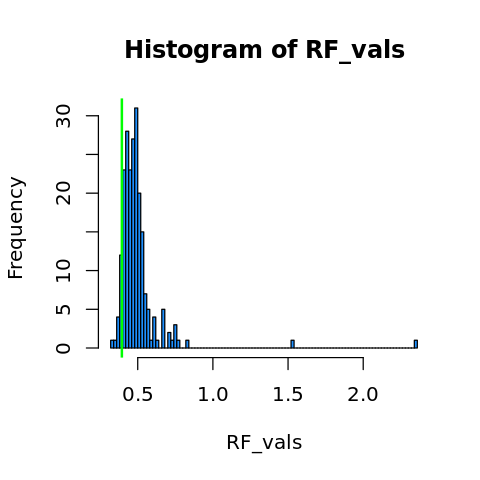

In [32]:
options(repr.plot.width=4, repr.plot.height=4)
hist(RF_vals, breaks = 100, col = "dodgerblue1")
abline(v = pdu_wRF,lwd = 2, col = "green")

# [21.09] Посчитаем деревья для кор-регионов подрядидущих ортогрупп

In [1]:
import pandas as pd

In [3]:
og = pd.read_csv("orthosnake/pdu/Results/Orthogroups.tsv", sep="\t", header = None)

In [4]:
core_og_pd =  pd.read_csv("orthosnake/pdu/Results/Orthogroups_SingleCopyOrthologues.txt", header = None)
core_og = core_og_pd[0].to_list()

In [5]:
core_og_pd = og[og[0].isin(core_og)]
core_og_in_genome = core_og_pd[1]
og_by_cds = dict(zip(core_og_in_genome, core_og_pd[0]))

#core_og_in_genome[0:3]

In [6]:
ids = [int(cds.split("|")[1]) for cds in core_og_in_genome]
og_by_id = {int(cds.split("|")[1]):og_by_cds[cds] for cds in core_og_in_genome}


возьмем подряд идущие ОГ-ки (согласно первому попавшемуся штамму). Длину серии возьмем минимум 5

In [8]:
from itertools import groupby
from operator import itemgetter
og_core_sets = []
for k, g in groupby(enumerate(ids), lambda ix : ix[0] - ix[1]):
    ids_seq = list(map(itemgetter(1), g))
    if(len(ids_seq) < 4): 
        continue
    og_core_sets.append([og_by_id[x] for x in ids_seq])
og_core_sets[0:3]

[['OG0000875', 'OG0000876', 'OG0000877', 'OG0000878', 'OG0000879'],
 ['OG0000885',
  'OG0000886',
  'OG0000887',
  'OG0000888',
  'OG0000889',
  'OG0000890',
  'OG0000891',
  'OG0000892'],
 ['OG0000893', 'OG0000894', 'OG0000895', 'OG0000896']]

### write to files

In [70]:
!mkdir -p tree_to_compare/
!mkdir -p tree_to_compare/pdu
!mkdir -p tree_to_compare/pdu/og_lists/`

In [71]:
i = 0
for og_core_set in og_core_sets:
    fname = "tree_to_compare/pdu/og_lists/{}".format(i)
    i = i + 1
    with open(fname, 'w') as filehandle:
        for x in og_core_set:
            filehandle.write('%s\n' % x)


In [13]:
i = 0
with open("tree_to_compare/pdu/list_length.tsv", 'w') as filehandle:
    [print("{}\t{}".format(i, len(x))) for i,x in enumerate(og_core_sets)]
    

0	5
1	8
2	4
3	5
4	5
5	5
6	16
7	9
8	19
9	6
10	8
11	8
12	5
13	5
14	8
15	4
16	4
17	5
18	6
19	10
20	6
21	16
22	8
23	6
24	6
25	4
26	6
27	4
28	4
29	6
30	8
31	5
32	5
33	7
34	4
35	6
36	6
37	5
38	14
39	12
40	9
41	5
42	7
43	18
44	9
45	10
46	4
47	4
48	9
49	9
50	7
51	11
52	4
53	4
54	10
55	10
56	6
57	6
58	11
59	4
60	9
61	8
62	5
63	5
64	6
65	4
66	4
67	4
68	4
69	4
70	4
71	6
72	11
73	6
74	4
75	13
76	4
77	4
78	5
79	6
80	9
81	6
82	6
83	4
84	4
85	10
86	4
87	6
88	18
89	5
90	5
91	4
92	6
93	8
94	5
95	4
96	8
97	5
98	4
99	5
100	6
101	5
102	6
103	4
104	5
105	20
106	9
107	4
108	7
109	14
110	7
111	8
112	9
113	7
114	5
115	4
116	5
117	4
118	6
119	8
120	18
121	4
122	8
123	6
124	6
125	4
126	7
127	4
128	14
129	4
130	4
131	7
132	8
133	4
134	5
135	5
136	9
137	4
138	5
139	8
140	4
141	12
142	7
143	6
144	12
145	7
146	11
147	4
148	5
149	15
150	6
151	7
152	4
153	6
154	11
155	5
156	5
157	8
158	5
159	4
160	13
161	25
162	4
163	9
164	7
165	17
166	7
167	14
168	5
169	4
170	4
171	4
172	4
173	4
174	20
175	7
176	9
177	6
178	4
179	6


## [16.09]

### найдем опероны для какого-нибудь штамма (ЛФ82?)

In [4]:
grep "LF82" genomes_with_regions/pdu/*

genomes_with_regions/pdu/GCF_000284495.1_ASM28449v1_genomic.fna:>NC_011993.1 Escherichia coli LF82, complete genome


In [ ]:
ls /data11/bio/runs-manolov/from_7a/runs-manolov/ecoli_crohn/analyse/
